# Lecture 2

*Date:* Sept 4, 2024

I want to thank Yash Chandra for his help in annotating this notebook.

## Additional Constants

The imaginary number $i=\sqrt{-1}$ and infinity $\infty$.

The imaginary number $i = \sqrt{-1}$ is denoted by either `i` or `I` in Sage. I prefer to use `I` because I often use `i` for an integer variable.

In [1]:
I

I

In [2]:
I^2

-1

In [3]:
i^2

-1

The &ldquo;constant&rdquo; $+\infty$ can be accessed with either `Infinity` or `oo`.

In [4]:
Infinity

+Infinity

Below we verify that `Infinity` is indeed $\infty$ by comparing it with a positive number.

In [5]:
10^100 < Infinity

True

By negating, we get $-\infty$.

In [6]:
-Infinity

-Infinity

Here is another way to write infinity.

In [7]:
oo

+Infinity

## Documentation within the notebook

By appending a `?` to a function or method, you can view some documentation for it which describes how to use the particular function or method, often with examples. A few examples of this follow.

In [8]:
factorial?

Type:           Function_factorial
String form:    factorial
File:           ~/Git/sage/sage/src/sage/functions/other.py
Docstring:     
   Returns the factorial of n.

   INPUT:

   * "n" -- a non-negative integer, a complex number (except negative
     integers) or any symbolic expression

   OUTPUT: an integer or symbolic expression

   EXAMPLES:

      sage: factorial(0)
      1
      sage: factorial(4)
      24
      sage: factorial(10)
      3628800
      sage: factorial(6) == 6*5*4*3*2
      True

      sage: x = SR.var('x')
      sage: f = factorial(x + factorial(x)); f
      factorial(x + factorial(x))
      sage: f(x=3)
      362880
      sage: factorial(x)^2
      factorial(x)^2

   To prevent automatic evaluation use the "hold" argument:

      sage: factorial(5, hold=True)
      factorial(5)

   To then evaluate again, we currently must use Maxima via
   "sage.symbolic.expression.Expression.simplify()":

      sage: factorial(5, hold=True).simplify()
      120

   We can a

Apparently, Sage can compute the Gamma function $\Gamma$ (which is a generalization of the factorial) as well.

In [9]:
factorial(3/2)

3/4*sqrt(pi)

In [10]:
factorial(I)

factorial(I)

In [11]:
e?

Type:           E
String form:    e
File:           ~/Git/sage/sage/src/sage/symbolic/expression.pyx
Docstring:     
   Dummy class to represent base of the natural logarithm.

   The base of the natural logarithm "e" is not a constant in
   GiNaC/Sage. It is represented by "exp(1)".

   This class provides a dummy object that behaves well under
   addition, multiplication, etc. and on exponentiation calls the
   function "exp".

   EXAMPLES:

   The constant defined at the top level is just "exp(1)":

      sage: e.operator()
      exp
      sage: e.operands()
      [1]

   Arithmetic works:

      sage: e + 2
      e + 2
      sage: 2 + e
      e + 2
      sage: 2*e
      2*e
      sage: e*2
      2*e
      sage: x*e
      x*e
      sage: var('a,b')
      (a, b)
      sage: t = e^(a+b); t
      e^(a + b)
      sage: t.operands()
      [a + b]

   Numeric evaluation, conversion to other systems, and pickling works
   as expected. Note that these are properties of the "exp()"
   functi

Below we defined a variable `fact_or_fiction` and assigned the value $34$ to it. Then calling `fact_or_fiction?` gives documentation for the `Integer` class.

In [12]:
fact_or_fiction = 34

In [13]:
fact_or_fiction?

Type:           Integer
String form:    34
File:           ~/Git/sage/sage/src/sage/rings/integer.pyx
Docstring:     
   The "Integer" class represents arbitrary precision integers. It
   derives from the "Element" class, so integers can be used as ring
   elements anywhere in Sage.

   The constructor of "Integer" interprets strings that begin with
   "0o" as octal numbers, strings that begin with "0x" as hexadecimal
   numbers and strings that begin with "0b" as binary numbers.

   The class "Integer" is implemented in Cython, as a wrapper of the
   GMP "mpz_t" integer type.

   EXAMPLES:

      sage: Integer(123)
      123
      sage: Integer("123")
      123

   Sage Integers support **PEP 3127** literals:

      sage: Integer('0x12')
      18
      sage: Integer('-0o12')
      -10
      sage: Integer('+0b101010')
      42

   Conversion from PARI:

      sage: Integer(pari('-10380104371593008048799446356441519384'))
      -10380104371593008048799446356441519384
      sage: Integer

## Domains in variables

For more information on `var` see the [documentation](https://doc.sagemath.org/html/en/reference/calculus/sage/calculus/var.html#sage.calculus.var.var) or type `var?`. Note that you can specify a domain of a symbolic variable.

The domain of a variable is the set containing it. By default, the domain of a symbolic variable is the complex numbers, $\mathbb C$.

In [14]:
var?

Docstring:     
   Create a symbolic variable with the name *s*.

   INPUT:

   * "args" -- A single string "var('x y')", a list of strings
     "var(['x','y'])", or multiple strings "var('x', 'y')". A single
     string can be either a single variable name, or a space or comma
     separated list of variable names. In a list or tuple of strings,
     each entry is one variable. If multiple arguments are specified,
     each argument is taken to be one variable. Spaces before or after
     variable names are ignored.

   * "kwds" -- keyword arguments can be given to specify domain and
     custom latex_name for variables. See EXAMPLES for usage.

   Note:

     The new variable is both returned and automatically injected into
     the global namespace. If you need a symbolic variable in library
     code, you must use either "SR.var()" or "SR.symbol()".

   OUTPUT:

   If a single symbolic variable was created, the variable itself.
   Otherwise, a tuple of symbolic variables. The varia

In [15]:
var('z')

z

This example shows that $z$ is complex. If $z$ was real, we'd get $z^2$ here:

In [16]:
sqrt(z^4)

sqrt(z^4)

In [17]:
var('x', domain='real')

x

Since $x$ is real, the following expression is simplified.

In [18]:
sqrt(x^4)

x^2

You can also specify that a variable is a positive real.

In [19]:
var('y', domain='positive')

y

This enables Sage to simplify $\sqrt{y}$.

In [20]:
sqrt(y^2)

y

It also can correctly evaluate the inequality $y > 0$:

In [21]:
bool(y > 0)

True

Since $x$ is real, the inequality $x>0$ may be true or false. Since SageMath cannot prove that $x>0$ is True, it returns `False`:

In [22]:
bool(x>0)

False

## Expressions

### Pretty printing

Sage allows for ways to illustrate math in a pretty format using `show`.

In [23]:
var('theta')

theta

In [24]:
show(theta)

theta

In [25]:
z = cos(2*theta) + sin(theta) + exp(theta)

In [26]:
z

cos(2*theta) + e^theta + sin(theta)

In [27]:
show(z)

cos(2*theta) + e^theta + sin(theta)

### Latex formatting of expressions

We can also get the LaTeX code for things and use it in a TeX editor to typeset math. We use the `latex` function:

In [28]:
latex(z)

\cos\left(2 \, \theta\right) + e^{\theta} + \sin\left(\theta\right)

### Simple plotting

We can plot a variety of things in Sage. Below we plot some functions that we defined above.

From above, `z` is a function of $\theta$:

In [29]:
z

cos(2*theta) + e^theta + sin(theta)

The following will plot $z$ as a function of $\theta$ between $-1$ and $2$.

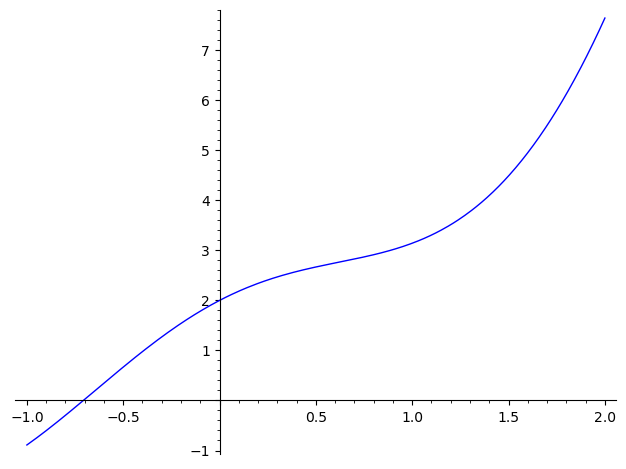

In [30]:
plot(z, (theta, -1, 2))

In [31]:
w = sin(theta)

We can specify colors for plots as follows.

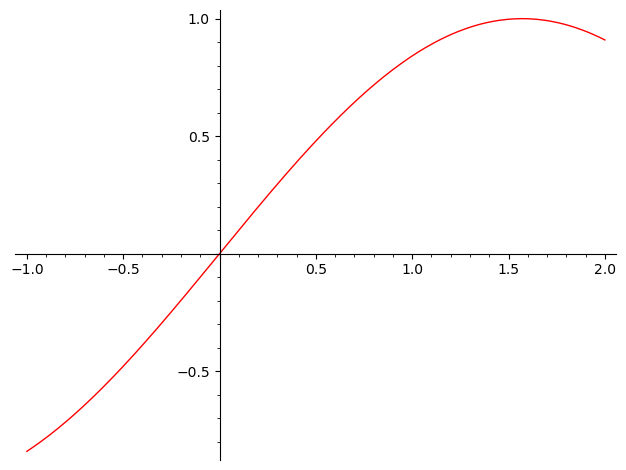

In [32]:
plot(w, (theta, -1, 2), color='red')

Multiple plots can be drawn together as below. We use `+` to add plots to display them on the same axes:

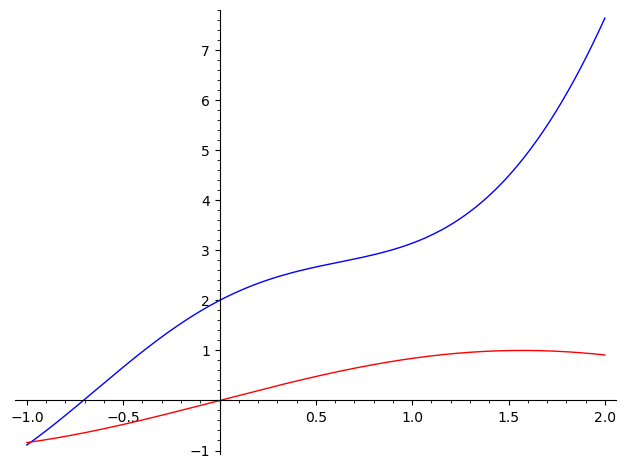

In [33]:
plt1 = plot(z, (theta, -1, 2))
plt2 = plot(w, (theta, -1, 2), color='red')
plt1 + plt2

### Substitution

Sage can do some substitution as follows.

In [34]:
var('x y')

(x, y)

In [35]:
z = x^2 * y + 3*y
z

x^2*y + 3*y

Setting $x=3$ in $z$ as above gives $12y$, as it should!

In [36]:
z(x = 3)

12*y

Setting $y=2$.

In [37]:
z(y=2)

2*x^2 + 6

Can substitute multiple variables together also.

In [38]:
z(x=7, y=1)

52

In [39]:
var('t')

t

Can do symbolic substitution also.

In [40]:
z(x=t^2-17)

(t^2 - 17)^2*y + 3*y

In [41]:
z

x^2*y + 3*y

Using the `subs` method. It's a bit mysterious, but if it sees an expression just as it is written, it can do the substitution.

In [42]:
z.subs(3*y == t)

x^2*y + t

In [43]:
z.subs(x*y == t)

x^2*y + 3*y

## Changing forms

In [44]:
var('x y')

(x, y)

In [45]:
z = x*(y+1) - 7*x

In [46]:
show(z)

x*(y + 1) - 7*x

In [47]:
z.simplify()

x*(y + 1) - 7*x

In [48]:
z.simplify?

Docstring:     
   Return a simplified version of this symbolic expression.

   INPUT:

   * "algorithm" -- one of :

        * "maxima" : (default) sends the expression to "maxima" and
          converts it back to Sage

        * "sympy" : converts the expression to "sympy", simplifies it
          (passing any optional keyword(s)), and converts the result
          to Sage

        * "giac" : converts the expression to "giac", simplifies it,
          and converts the result to Sage

        * "fricas" : converts the expression to "fricas", simplifies
          it, and converts the result to Sage

   See also:

     "simplify_full()", "simplify_trig()", "simplify_rational()",
     "simplify_rectform()" "simplify_factorial()", "simplify_log()",
     "simplify_real()", "simplify_hypergeometric()",
     "canonicalize_radical()"

   EXAMPLES:

      sage: a = var('a'); f = x*sin(2)/(x^a); f
      x*sin(2)/x^a
      sage: f.simplify()
      x^(-a + 1)*sin(2)

   Some simplifications are 

In [49]:
z.simplify(algorithm='maxima')

x*(y + 1) - 7*x

In [50]:
z.simplify(algorithm='sympy')

x*(y - 6)

In [51]:
z

x*(y + 1) - 7*x

In [52]:
zz = z.simplify(algorithm='sympy')
zz

x*(y - 6)

In [53]:
z

x*(y + 1) - 7*x

The `.factor()` method does what you think it does.

In [54]:
z.factor()

x*(y - 6)

It also applies to integers:

In [55]:
100.factor()

2^2 * 5^2

Here we consider an example with an obvious simplification:

In [56]:
z = (x^2 + x) / x
z

(x^2 + x)/x

Note that $x$ wasn't automatically canceled. Neither is it when we do a `.simplify()`:

In [57]:
z.simplify()

(x^2 + x)/x

But there is a `.simplify_rational()` which simplifies a rational expression.

In [58]:
z.simplify_rational()

x + 1

The `.full_simplify()` method does a sequence of simplifications including `.simplify_rational()`. In general this is something you want to apply if you hope to get the simplest form you can possibly get (but it doesn't always work...).

In [59]:
zz = z.full_simplify()
zz

x + 1

Consider the following equation. Remember we can force evaluation by enclosing in `bool`.

In [60]:
z == zz

(x^2 + x)/x == x + 1

It's worth pointing out that $z$ is the same as $zz$ only when $x \neq 0$. So, it is not clear (to me) what criterion they are using to say that these two expressions are the &ldquo;same.&rdquo;

In [61]:
bool(z == zz)

True

Sage admits that it cannot evaluate $z$ when $x=0$. But it can obviously evaluate $zz$ when $x=0$. Just a caveat.

In [62]:
z(x=0)

ValueError: power::eval(): division by zero

## Example "Proof"

**Theorem** Let $a$, $b$, and $c$ be points on a circle and let $d$ be the center of the circle. Then $\angle bdc = 2 \angle bac$.

We work in $\mathbb C$. Up to a Euclidean similarity, we may assume that $d=0$ and $a=1$. Then
$$b = \cos \beta+i \sin \beta \quad \text{and} \quad c=\cos \gamma + i \sin \gamma$$
for some angles $\beta$ and $\gamma$.

In [63]:
var('beta gamma', domain='real')

(beta, gamma)

In [64]:
a = 1
d = 0
b = cos(beta)+I*sin(beta)
c = cos(gamma) + I*sin(gamma)

**Basic fact:** A complex number $z$ has an argument (angle with positive real axis) and a modulus (distance from zero). Multiplication by $z$ rotates the plane by $\arg z$ about the origin and scales the plane by the modulus $|z|$.

Thus, multiplication by $c/b$ rotates by $\angle bdc$. (This multiplication fixes $d=0$ and sends $b$ to $c$.) Similarly multiplication by $\frac{c-a}{b-a}$ rotates by $\angle bac$. (This multiplication sends $b-a$ to $c-a$. Note that subtraction by $a$ translates the plane.) It follows that multiplication by 
$$z = \left(\frac{c-a}{b-a}\right)^2 \Big/ \frac{c}{b}$$
rotates the plane by $2 \angle bac - \angle bdc$ (and scales by an irrelevant amount). Thus to show $2 \angle bac - \angle bdc=0$, we can show that $\arg z=0$ or equivalently that $z$ is a positive real number.

Here is a our complex number $z$ that has the property that multiplication by it rotates by $2 \angle bac - \angle bdc$:

In [65]:
z = ((c-a)/(b-a))^2 / (c/b)
z

(cos(beta) + I*sin(beta))*(cos(gamma) + I*sin(gamma) - 1)^2/((cos(beta) + I*sin(beta) - 1)^2*(cos(gamma) + I*sin(gamma)))

We remark that any complex number can be written in the form $z = z_1 + i z_2$ where $z_1, z_2 \in \mathbb R$. The number $z_1$ is the real part, and the number $z_2$ is the imaginary part. These parts can be accessed with `z.real()` and `z.imag()`.

Below, we check to see that the imaginary part of $z$ is $0$, so it is indeed a real number:

In [66]:
bool(z.imag()==0)

True

Another way to check this would be as follows:

In [67]:
bool(z == z.real())

True

Anyway, this is great. We already know $z$ is real. But, we still need to show it is positive.

We will isolate the real part of it, and use standard simplification methods.

In [68]:
zr = z.real()
zr

cos(beta)^3*cos(gamma)^3/((cos(beta)^4 + 2*cos(beta)^2*sin(beta)^2 + sin(beta)^4 - 4*cos(beta)^3 - 4*cos(beta)*sin(beta)^2 + 6*cos(beta)^2 + 2*sin(beta)^2 - 4*cos(beta) + 1)*(cos(gamma)^2 + sin(gamma)^2)) + cos(beta)*cos(gamma)^3*sin(beta)^2/((cos(beta)^4 + 2*cos(beta)^2*sin(beta)^2 + sin(beta)^4 - 4*cos(beta)^3 - 4*cos(beta)*sin(beta)^2 + 6*cos(beta)^2 + 2*sin(beta)^2 - 4*cos(beta) + 1)*(cos(gamma)^2 + sin(gamma)^2)) + cos(beta)^2*cos(gamma)^2*sin(beta)*sin(gamma)/((cos(beta)^4 + 2*cos(beta)^2*sin(beta)^2 + sin(beta)^4 - 4*cos(beta)^3 - 4*cos(beta)*sin(beta)^2 + 6*cos(beta)^2 + 2*sin(beta)^2 - 4*cos(beta) + 1)*(cos(gamma)^2 + sin(gamma)^2)) + cos(gamma)^2*sin(beta)^3*sin(gamma)/((cos(beta)^4 + 2*cos(beta)^2*sin(beta)^2 + sin(beta)^4 - 4*cos(beta)^3 - 4*cos(beta)*sin(beta)^2 + 6*cos(beta)^2 + 2*sin(beta)^2 - 4*cos(beta) + 1)*(cos(gamma)^2 + sin(gamma)^2)) + cos(beta)^3*cos(gamma)*sin(gamma)^2/((cos(beta)^4 + 2*cos(beta)^2*sin(beta)^2 + sin(beta)^4 - 4*cos(beta)^3 - 4*cos(beta)*sin(beta

We will just experiment. First we try `trig_reduce`:

In [69]:
zr2 = zr.trig_reduce()
zr2

-1/64*(cos(3*beta + 3*gamma) + 3*cos(3*beta + gamma) - cos(beta + 3*gamma) - 3*cos(beta + gamma) - cos(-beta + 3*gamma) - 3*cos(-beta + gamma) + cos(-3*beta + 3*gamma) + 3*cos(-3*beta + gamma))/(cos(2*beta) - 4*cos(beta) + 3) - 1/64*(cos(3*beta + 3*gamma) + cos(3*beta + gamma) + cos(beta + 3*gamma) + cos(beta + gamma) - cos(-beta + 3*gamma) - cos(-beta + gamma) - cos(-3*beta + 3*gamma) - cos(-3*beta + gamma))/(cos(2*beta) - 4*cos(beta) + 3) + 1/64*(cos(3*beta + 3*gamma) + cos(3*beta + gamma) - 3*cos(beta + 3*gamma) - 3*cos(beta + gamma) + 3*cos(-beta + 3*gamma) + 3*cos(-beta + gamma) - cos(-3*beta + 3*gamma) - cos(-3*beta + gamma))/(cos(2*beta) - 4*cos(beta) + 3) - 1/64*(cos(3*beta + 3*gamma) - cos(3*beta + gamma) + 3*cos(beta + 3*gamma) - 3*cos(beta + gamma) + 3*cos(-beta + 3*gamma) - 3*cos(-beta + gamma) + cos(-3*beta + 3*gamma) - cos(-3*beta + gamma))/(cos(2*beta) - 4*cos(beta) + 3) + 1/64*(cos(3*beta + 3*gamma) - cos(3*beta + gamma) - cos(beta + 3*gamma) + cos(beta + gamma) - cos(-

Now since we see a lot of fractions, let's attempt to simplify them:

In [70]:
zr3 = zr2.simplify_rational()
zr3

(cos(beta + gamma) - 2*cos(beta) + cos(-beta + gamma) - 2*cos(gamma) + 2)/(cos(2*beta) - 4*cos(beta) + 3)

This is looking better, but we can't do much algebraic with the expressions in the cosines. So, we expand them:

In [71]:
zr4 = zr3.trig_expand()
zr4

2*(cos(beta)*cos(gamma) - cos(beta) - cos(gamma) + 1)/(cos(beta)^2 - sin(beta)^2 - 4*cos(beta) + 3)

Now the denominator looks a bit weird. The only sine term appears in the denominator, and it is $\sin(\beta)^2$, so it seems like it would be better to convert it into cosine. We'll do this explicitly. Note that we are not changing the value of the expression:

In [72]:
zr5 = zr4.subs(sin(beta)^2 == 1 - cos(beta)^2)
zr5

(cos(beta)*cos(gamma) - cos(beta) - cos(gamma) + 1)/(cos(beta)^2 - 2*cos(beta) + 1)

Now the denomiantor clearly factors. The numerator does too and things cancel:

In [73]:
zr6 = zr5.factor()
zr6

(cos(gamma) - 1)/(cos(beta) - 1)

Now you can see that $z>0$. Indeed $\cos(\gamma)-1 \leq 0$ and $\cos (\beta)-1 \leq 0$, so their ratio is non-negative. In fact, it is possible to see that neither $\cos(\gamma)-1$ nor $\cos(\beta) - 1$ can be zero, because if they were than some of our points ($a$, $b$, or $c$) would have to coincide. So, we conclude that $z>0$. Finishing the proof.

Because the imaginary part of $z$ is zero and the real part is $\frac{\cos(\gamma)-1}{\cos(\beta)-1}$, we actually have
$$z = \frac{\cos(\gamma)-1}{\cos(\beta)-1}.$$
We can check this:

In [74]:
bool(z == (cos(gamma) - 1)/(cos(beta) - 1))

True

Note that Sage has a pretty easy time proving equality (if you get it right), but has difficulty with inequalities:

In [75]:
bool(z >= 0)

False

With the simplified version, it is okay:

In [76]:
bool(zr6 >= 0)

True

## Sage fuctions and calculus

In addition to expressions, you can also define Sage functions, which allow you to use traditional function notation. Below we give an example of a Sage (or symbolic) function:

In [77]:
f(x) = exp(sin(x))

The difference above is the left side is `f(x)` rather than just `f` as above. Note that this defines two variables: `f` and `x`.

When we print `f` now we can see it is a function:

In [78]:
f

x |--> e^sin(x)

In [79]:
show(f)

x |--> e^sin(x)

We can use traditional function notation for evaluation of the function:

In [80]:
f(7)

e^sin(7)

We can also use the `subs` method as before:

In [81]:
f.subs(sin(x) == 1/2)

x |--> e^(1/2)

If we don't want the symbolic function when we do this, we can apply the substitution to `f(x)` rather than to `f`:

In [82]:
f(x).subs(sin(x) == 1/2)

e^(1/2)

We can also take derivatives:

In [83]:
f

x |--> e^sin(x)

In [84]:
f.derivative()

x |--> cos(x)*e^sin(x)

It is also okay to specify the variable we take a derivative with respect to:

In [85]:
f.derivative(x)

x |--> cos(x)*e^sin(x)

**Another example:** We will observe how defining a function creates variables. First note that the variable `s` is not defined:

In [86]:
s

NameError: name 's' is not defined

The following function definition will define three variables: `u`, `s` and `t`. The variables `s` and `t` will be symbolic variables.

In [87]:
u(s, t) = 2*s*t^3

In [88]:
s

s

Let's do it again and demonstrate that the current value of `t` is overriden. First we define `t` to be `7`:

In [89]:
t = 7
t

7

Now we define `u`.

In [90]:
u(s, t) = 2*s*t^3

Now observe that `t` is no longer $7$. Instead it is a symbolic variable:

In [91]:
t

t

Let's do some more calculus. Some examples of doing differentiation and integration below.

Derivative with respect to $s$:

In [92]:
u.derivative(s)

(s, t) |--> 2*t^3

Derivative with respect to $t$:

In [93]:
u.derivative(t)

(s, t) |--> 6*s*t^2

Total derivative (or gradient):

In [94]:
u.derivative()

(s, t) |--> (2*t^3, 6*s*t^2)

The following calculates the second derivative. Since the first derivative is a function from 2 variables to 2 variables, the second derivative is a $2 \times 2$ matrix.

In [95]:
u.derivative().derivative()

[     (s, t) |--> 0  (s, t) |--> 6*t^2]
[ (s, t) |--> 6*t^2 (s, t) |--> 12*s*t]

**Another simple example:** We define $f(x) = \sin(x)$.

In [96]:
f(x)=sin(x)

Here we compute the definite integral with respect to $x$ from $0$ to $pi$:

In [97]:
f.integrate(x, 0, pi)

2

We can also do indefinite integration with respect to $x$:

In [98]:
f.integrate(x)

x |--> -cos(x)

Now let's go back to our example with two variables.

In [99]:
u(s, t) = 2*s*t^3

Integration with respect to $s$ from $0$ to $1$ integrates away the `s` variable, but the `t` variable remains:

In [100]:
u.integrate(s, 0, 1)

t |--> t^3

Here we compute the double integral over the rectangle $[0,1] \times [2,4]$ in the $st$-plane.

In [101]:
u.integrate(s, 0, 1).integrate(t, 2, 4)

60

## Symbolic solving

**Problem:** Find the points in the plane whose distance from $(3, 5)$ is $7$ and whose distance from $(2, 2)$ is $5$.

In [102]:
var('x y', domain='real')

(x, y)

This defines a circle in the plane with center at $(3,5)$ and radius $7$:

In [103]:
eq1 = (x-3)^2 + (y-5)^2 == 7^2
eq1

(x - 3)^2 + (y - 5)^2 == 49

This defines a circle in the plane with center at $(2,2)$ and radius $5$:

In [104]:
eq2 = (x-2)^2 + (y-2)^2 == 5^2
eq2

(x - 2)^2 + (y - 2)^2 == 25

We use `solve` to simultaneously solve the equations of the two circles. It gives the solutions as a list of lists, where each element of the inner list is a point written as a pair of coordinates.

In [105]:
sol = solve([eq1, eq2], [x, y])
sol

[[x == -3/10*sqrt(201) + 13/10, y == 1/10*sqrt(201) - 1/10], [x == 3/10*sqrt(201) + 13/10, y == -1/10*sqrt(201) - 1/10]]

Accessing the first point.

In [106]:
sol[0]

[x == -3/10*sqrt(201) + 13/10, y == 1/10*sqrt(201) - 1/10]

Accessing the $x$-coordinate of the first point.

In [107]:
sol[0][0]

x == -3/10*sqrt(201) + 13/10

Accessing the numerical value of the $x$-coordinate of the first point.

In [108]:
sol[0][0].right_hand_side()

-3/10*sqrt(201) + 13/10

In case you forget the `right_hand_side()` method, you can use tab completion. But you have to define an object equal to `sol[0][0]` before you can do this:

In [109]:
v = sol[0][0]

Now `v.ri<tab>` produces a list. We notice from this that it is also possible to call `v.right()`. This seems to be the same as `v.right_hand_side()`:

In [110]:
v.right()

-3/10*sqrt(201) + 13/10

I find it easier to work with dictionaries than symbolic equations as above. There is a `solution_dict` keyword argument you can use to get solutions returns the points as a dictionary (a map):

In [111]:
sol2 = solve([eq1, eq2], [x, y], solution_dict=True)
sol2

[{x: -3/10*sqrt(201) + 13/10, y: 1/10*sqrt(201) - 1/10},
 {x: 3/10*sqrt(201) + 13/10, y: -1/10*sqrt(201) - 1/10}]

The curly brackets above indicate a dictionary. The value `sol2` is a list consisting of two dictionaries, the first is:
```
sol[0] = {x: -3/10*sqrt(201) + 13/10, y: 1/10*sqrt(201) - 1/10}
```
To access the coordinates, we use square brackets to apply the map in the dictionary. So, to access the coordinates we can use `sol[0][x]` and `sol[0][y]`:

In [112]:
sol2[0][x]

-3/10*sqrt(201) + 13/10

In [113]:
sol2[0][y]

1/10*sqrt(201) - 1/10